# Provided Sample Code

In [1]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [2]:
# learn a line segment

In [3]:
# generate data for a line segment [0.5, 1.5) (y=1) and 
# for points outside the line segent [1.5, 2.0] (y=0)

npts = 1000

X1 = np.zeros((npts,1))
y0 = np.zeros(npts)
y1 = np.zeros(npts)

for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0)         
    if ((X1[i,0]<=0.5) or (X1[i,0]>1.5)):
        y1[i] = 0
    else:
        y1[i] = 1


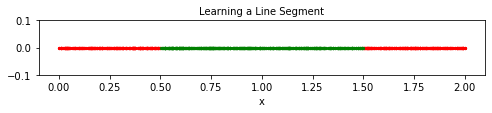

In [4]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 1))
plt.title('Learning a Line Segment', fontsize='medium')
plt.xlabel('x')
plt.ylabel('')
plt.scatter(x = X1[y1==0, 0], y=y0[y1==0], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y=y0[y1==1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,0.1)
plt.show()

In [5]:
# split data into 50% training and 50% test data

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

if (npts==20):
    print(np.sort(X1_train.transpose()))

In [6]:
# Fit for various depth trees
MaxDepth = 4
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X1_train, y1_train)

    X1_combined = np.vstack((X1_train, X1_test))
    y1_combined = np.hstack((y1_train, y1_test))

    # optional outputs
    z = tree.apply(X1_combined)
    #print(z)
    dp = tree.decision_path(X1_combined)
    #print (dp)
    
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    print(i+1,Errors[i,0],Errors[i,1])


Max Depth, Training, Test
1 0.23399999999999999 0.256
2 0.0 0.0040000000000000036
3 0.0 0.0040000000000000036
4 0.0 0.0040000000000000036


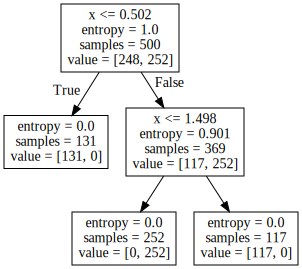

In [7]:
# plot the final decision gree
export_graphviz(tree, out_file='T1.dot', feature_names=['x'])
with open('T1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [8]:
#
# If you want to generate a .png file of the image of the tree use the following steps:
# 1) Install GraphViz on your computer
# 2) Open a command prompt
# 3) Go to the directory in which the T1.dot file was stored 
#    when you ran the preceeding cell
#    It will probably be the same directory that this .ipynb file is in
# 4) Run the command:  dot -Tpng T1.dot -o T1.png
# 5) The image will be in the file T1.png
#

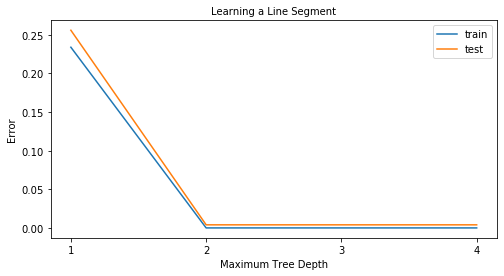

In [9]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning a Line Segment', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [10]:
# learn an axis-aligned rectangle

In [11]:
# generate data for an axis-aligned rectangle with vertex coordinates
# (0.5,0.5),(0.5,1.5),(1.5,0.5),(1.5,1.5) 
# for points inside the rectangke, y=1 and for points outside the rectangle, y=0.

npts = 10000

X2 = np.zeros((npts,2))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0) 
    if ((X2[i,0]<=0.5) or (X2[i,0]>1.5) or (X2[i,1]<=0.5) or (X2[i,1]>1.5)):
        y2[i] = 0
    else:
        y2[i] = 1
        

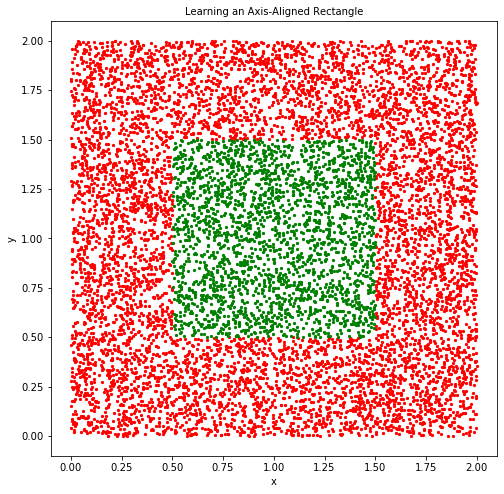

In [12]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Axis-Aligned Rectangle', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [13]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)


In [14]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.24639999999999995 0.2548
2 0.24639999999999995 0.2548
3 0.12339999999999995 0.118
4 0.0 0.0008000000000000229
5 0.0 0.0008000000000000229


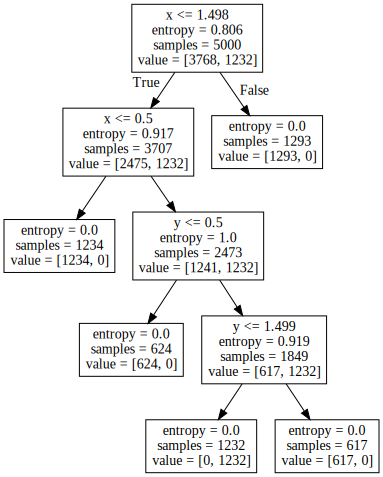

In [15]:
# plot the final decision gree
export_graphviz(tree, out_file='T2.dot', feature_names=['x','y'])
with open('T2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

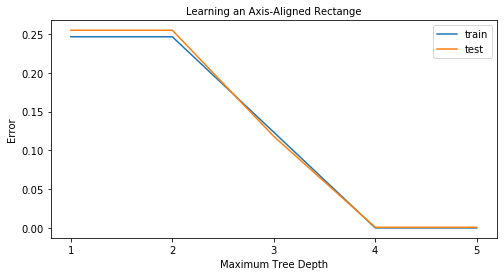

In [16]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [17]:
# learn an origin-aligned circle using x and y using only x and y as features

In [18]:
# generate data for an origin-centered circle centered with radius 0.5 

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0) 
    if ((X5[i,0]**2+X5[i,1]**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

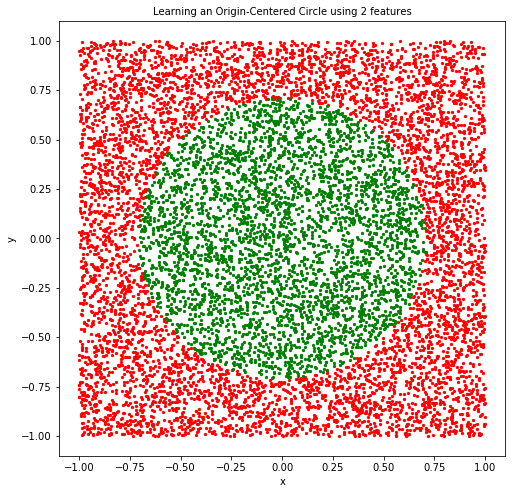

In [19]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 2 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [20]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [21]:
# Fit for various depth trees
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.37539999999999996 0.39880000000000004
2 0.30479999999999996 0.30300000000000005
3 0.18879999999999997 0.19120000000000004
4 0.08440000000000003 0.08420000000000005
5 0.08040000000000003 0.07979999999999998
6 0.0696 0.06920000000000004
7 0.0474 0.047599999999999976
8 0.03059999999999996 0.03600000000000003
9 0.016599999999999948 0.029200000000000004
10 0.010399999999999965 0.019399999999999973


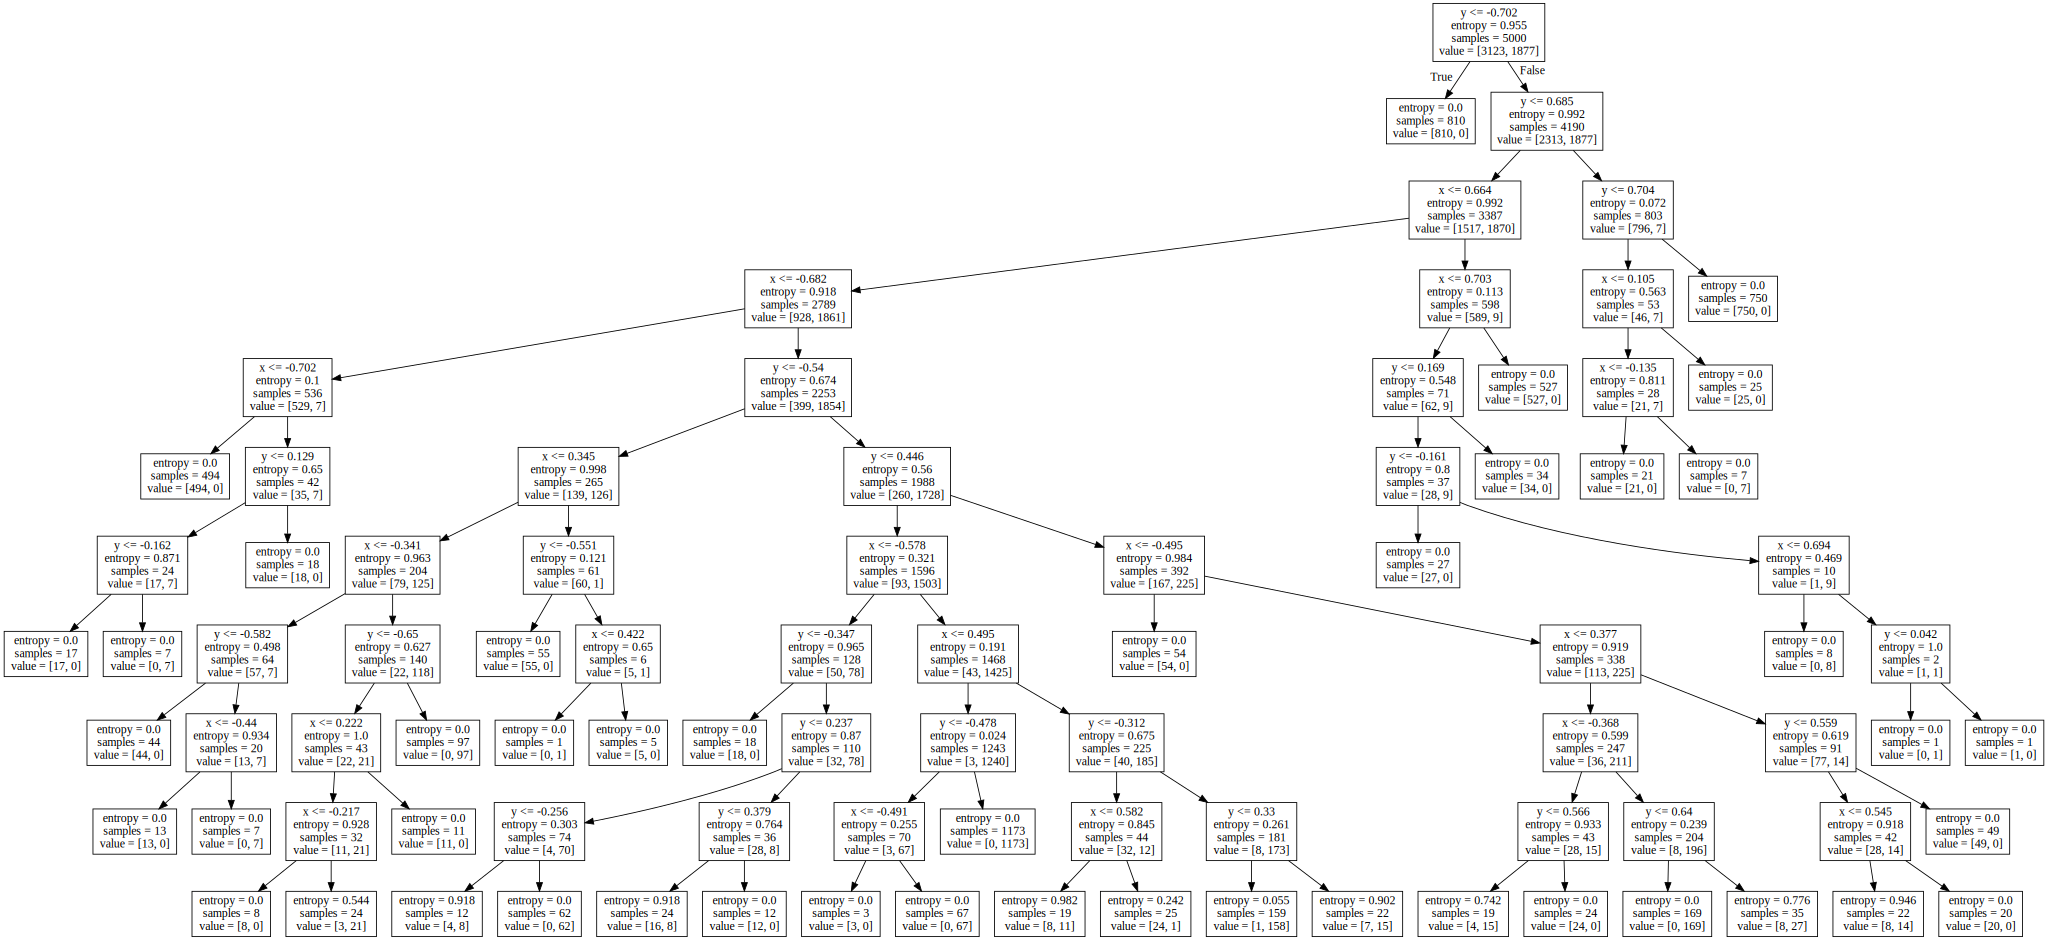

In [22]:
# plot the final decision gree
export_graphviz(tree, out_file='T5.dot', feature_names=['x','y','','',''])
with open('T5.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

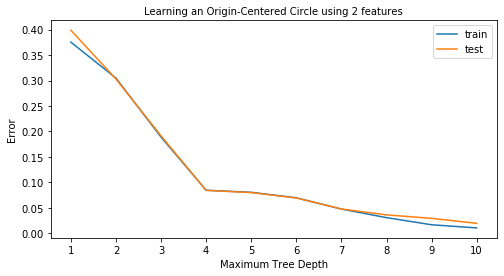

In [23]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [24]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 as the features

In [25]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X5 = np.zeros((npts,5))
y5 = np.zeros(npts)

for i in range(0,npts): 
    X5[i,0] = np.random.uniform(-1.0,1.0) 
    X5[i,1] = np.random.uniform(-1.0,1.0)
    X5[i,2] = X5[i,0]**2
    X5[i,3] = X5[i,0]*X5[i,1]
    X5[i,4] = X5[i,1]**2
    
    
    if (((X5[i,0])**2+(X5[i,1])**2) >= 0.5):
        y5[i] = 0
    else:
        y5[i] = 1
  

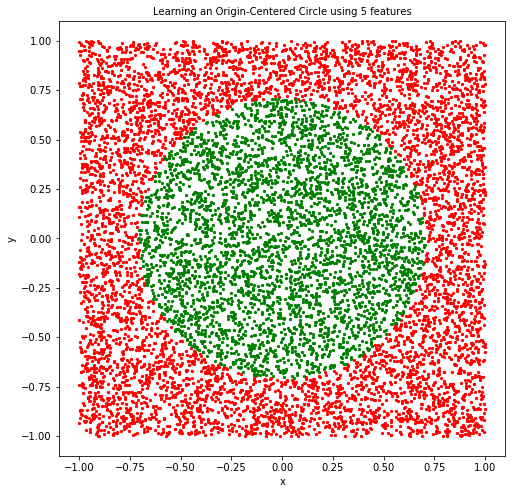

In [26]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 5 features', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X5[y5==0, 0], y = X5[y5==0, 1], color='red', label='0', s=5)
plt.scatter(x = X5[y5==1, 0], y = X5[y5==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [27]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X5_train, X5_test, y5_train, y5_test = train_test_split(
         X5, y5, test_size=0.50, random_state=0)


In [28]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X5_train, y5_train)

    X5_combined = np.vstack((X5_train, X5_test))
    y5_combined = np.hstack((y5_train, y5_test))

    # optional outputs
    z = tree.apply(X5_combined)
    #print(z)
    dp = tree.decision_path(X5_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X5_train,y5_train)
    Errors[i,1] = 1 - tree.score(X5_test,y5_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.2996 0.31620000000000004
2 0.07540000000000002 0.0826
3 0.07420000000000004 0.08140000000000003
4 0.020199999999999996 0.027800000000000047
5 0.019000000000000017 0.02980000000000005
6 0.007199999999999984 0.012800000000000034
7 0.005600000000000049 0.013599999999999945
8 0.0013999999999999568 0.006800000000000028
9 0.0008000000000000229 0.007199999999999984
10 0.0 0.00660000000000005


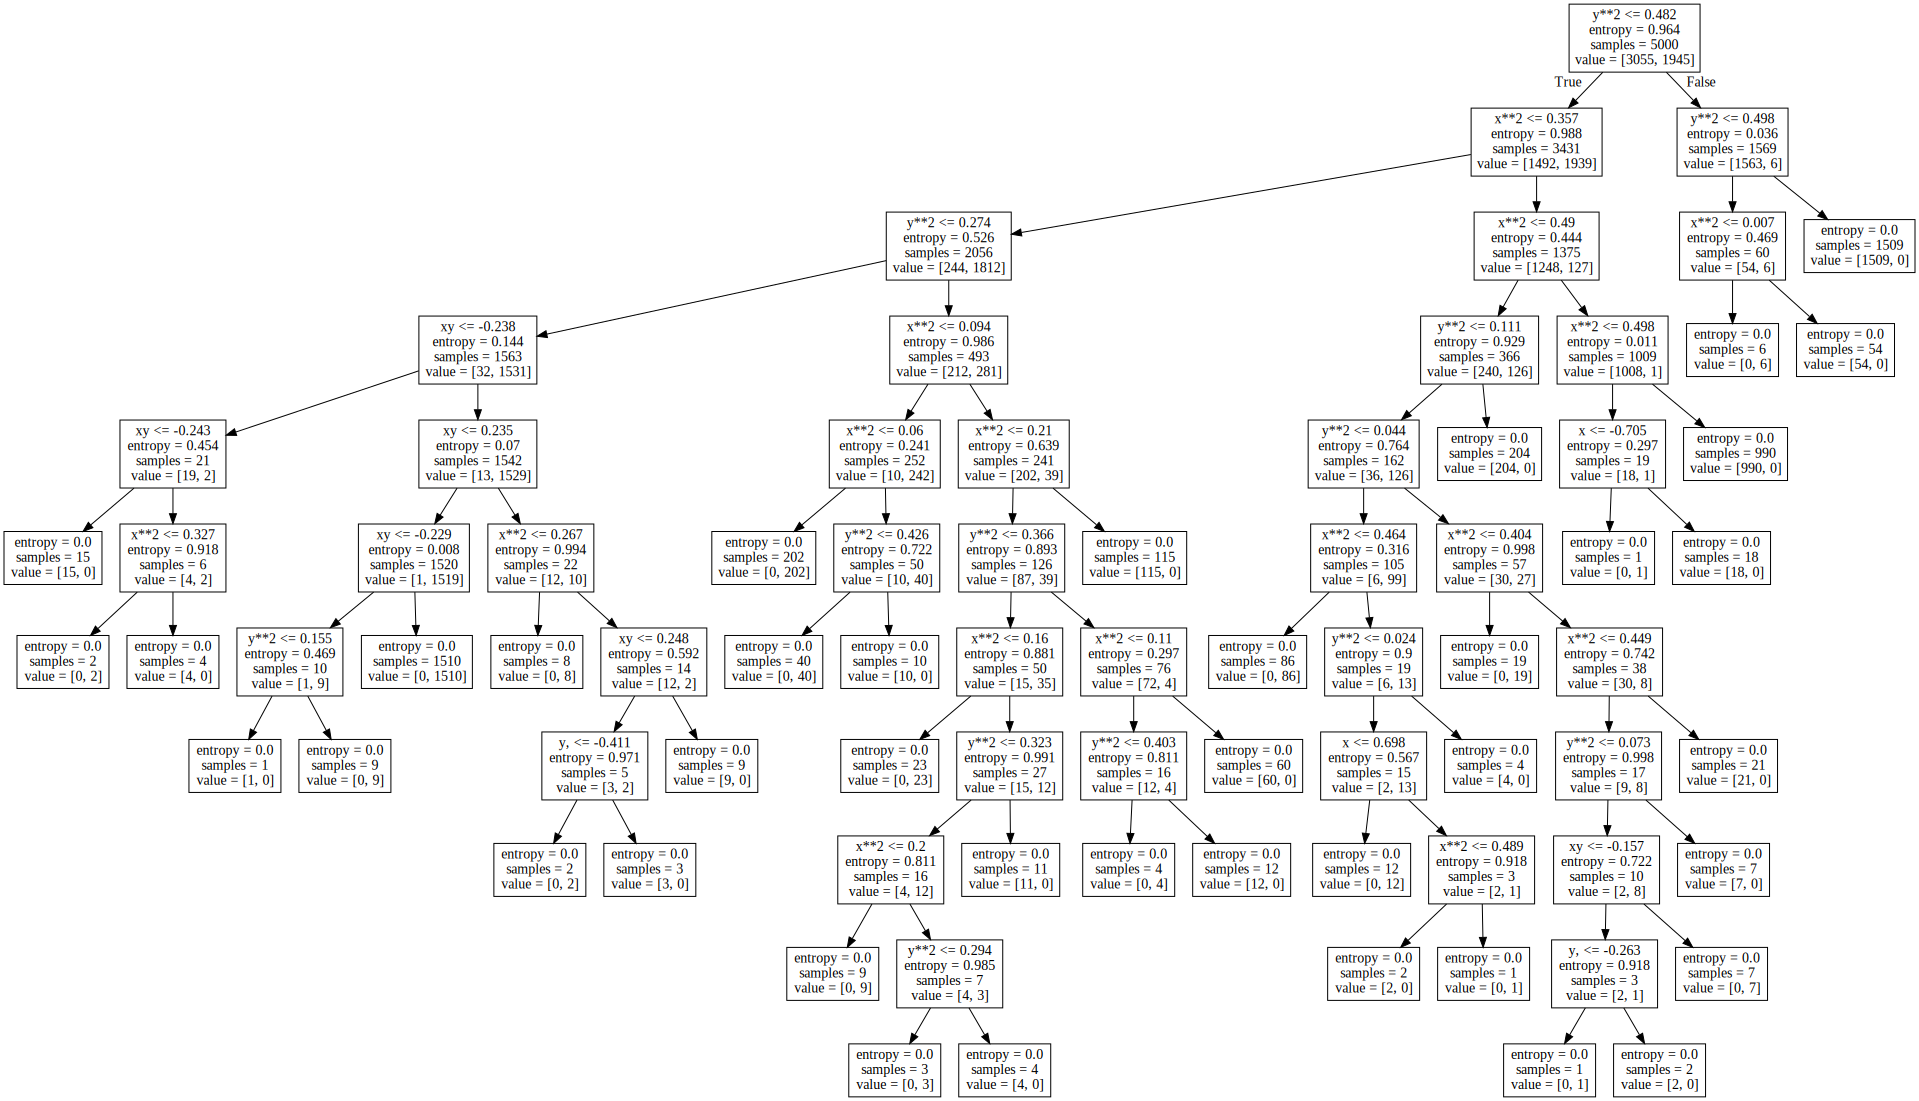

In [29]:
# plot the final decision gree
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

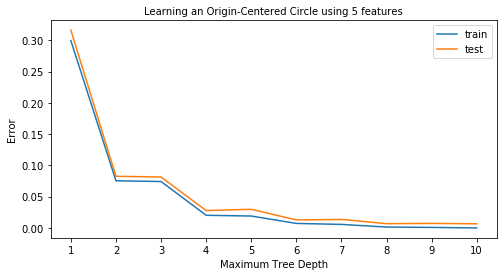

In [30]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 5 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [31]:
# learn an origin-aligned circle using x, y, x**2, xy, y**2 AND (x**2+y**2) as feature

In [32]:
# generate data for an circle centered at (1.0,1.0) with radius 0.5

npts = 10000

X6 = np.zeros((npts,6))
y6 = np.zeros(npts)

for i in range(0,npts): 
    X6[i,0] = np.random.uniform(-1.0,1.0) 
    X6[i,1] = np.random.uniform(-1.0,1.0)
    X6[i,2] = X6[i,0]**2
    X6[i,3] = X6[i,0]*X5[i,1]
    X6[i,4] = X6[i,1]**2
    X6[i,5] = X6[i,0]**2+X6[i,1]**2
    
    
    
    if (((X6[i,0])**2+(X6[i,1])**2) >= 0.5):
        y6[i] = 0
    else:
        y6[i] = 1
  

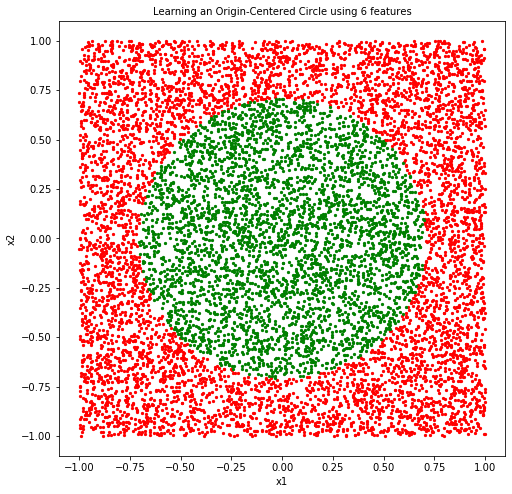

In [33]:
# plot data points
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning an Origin-Centered Circle using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X6[y6==0, 0], y = X6[y6==0, 1], color='red', label='0', s=5)
plt.scatter(x = X6[y6==1, 0], y = X6[y6==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()

In [34]:
# split data into 50% training and 50% test data
from sklearn.model_selection import train_test_split

X6_train, X6_test, y6_train, y6_test = train_test_split(
         X6, y6, test_size=0.50, random_state=0)


In [35]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X6_train, y6_train)

    X6_combined = np.vstack((X6_train, X6_test))
    y6_combined = np.hstack((y6_train, y6_test))

    # optional outputs
    z = tree.apply(X6_combined)
    #print(z)
    dp = tree.decision_path(X6_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X6_train,y6_train)
    Errors[i,1] = 1 - tree.score(X6_test,y6_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 0.0 0.0
6 0.0 0.0
7 0.0 0.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0


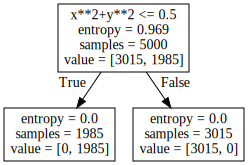

In [36]:
# plot the final decision gree
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x**2','xy','y**2','x**2+y**2'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

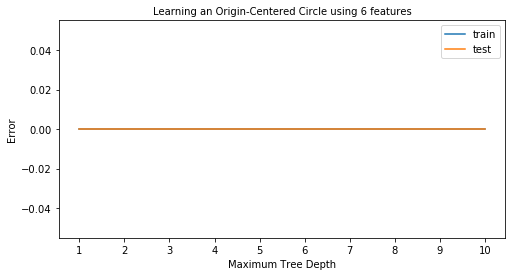

In [37]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


# Assignment 3